# Clustering on Landsat Satellite Data

The data set consists of the multi-spectral values of pixels in 3x3 neighbourhoods in a satellite image, and the label information associated with the central pixel in each neighbourhood. This data set was generated from Landsat Multi-Spectral Scanner image data. To facilitate your data analysis process, we have done sampling and data pre-processing for you. All the features are named as “Feature #”, and the last attribute is the label (each number corresponds to a class).

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans


In [2]:
data=pd.read_csv('data/landsat/landsat.csv')
data

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 28,Feature 29,Feature 30,Feature 31,Feature 32,Feature 33,Feature 34,Feature 35,Feature 36,Label
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,51,68,85,71,51,75,93,79,55,75,...,79,56,81,97,79,52,73,93,79,1
5996,55,75,96,79,55,72,93,71,55,72,...,79,52,66,86,72,52,66,82,68,1
5997,55,72,93,71,55,72,85,75,59,79,...,72,52,66,82,68,56,70,82,72,1
5998,55,72,85,75,59,79,93,75,59,91,...,68,56,70,82,72,56,84,97,79,1


In [3]:
data.shape

(6000, 37)

In [4]:
# Specifying features and target attribute
X = data.drop(['Label'], axis='columns')

# Pre-processing with standardization
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X_data = X.values
X_scaled = scaler.fit_transform(X_data)
X = X_scaled

y = data['Label'].values

In [5]:
# K-means clustering model
import math
model = KMeans(n_clusters=5)
model.fit(X)
#print('\n cluster means: \n', model.cluster_centers_)
print('\n inertia: %f'% model.inertia_)
print('\n average inertia: %f\n' % math.sqrt(model.inertia_/y.size))


 inertia: 1870.742497

 average inertia: 0.558382



Smaller inertia means denser clusters.Inertia is the sum of squared error for each cluster. 

In [6]:
from sklearn.metrics import davies_bouldin_score, adjusted_rand_score

labels = model.labels_
scores=davies_bouldin_score(X, labels)
print('\n davies_bouldin_score: %f\n' % scores)


 davies_bouldin_score: 1.010490



Davies Bouldin score is the average similarity measure of each cluster with its most similar cluster, the lower the value, the better the model.

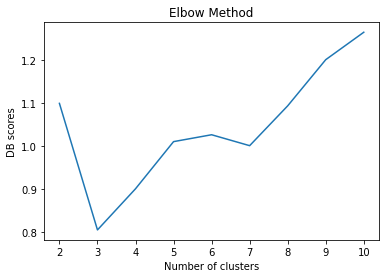

In [8]:
from matplotlib import pyplot as plt
distortions = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    labels = kmeans.labels_
    distortions.append(davies_bouldin_score(X, labels))
    
# Plot the relationship between the distortion and k
plt.plot(range(2, 11), distortions)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('DB scores')
plt.show()

The elbow of the graph is at 3, which means it is a good value for clustering the dataset. 

In [9]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, adjusted_rand_score

from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 

C:\Users\Tamanna\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [10]:
y_pred = kmeans.predict(X)

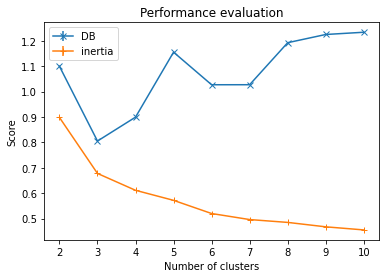

In [11]:
db_scores = []
db_scores_std = []


# Inertia (average standardized)
inertia = []
inertia_std = []

for i in range(2, 11):
    # Multiple runs for stable indicators
    db_scores_tmp = []
    ar_scores_tmp=[]
    inertias_tmp = []
    
    n_iteration=10
    
    for j in range(0, n_iteration):
        kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=5, n_init=3,random_state=0)
        kmeans.fit(X)
        labels = kmeans.labels_
        db_scores_tmp.append(davies_bouldin_score(X, labels))
        inertias_tmp.append(math.sqrt(kmeans.inertia_/X.shape[0]))
    
    db_scores.append(np.mean(db_scores_tmp))
    db_scores_std.append(np.std(db_scores_tmp))
    
    inertia.append(np.mean(inertias_tmp))
    inertia_std.append(np.std(inertias_tmp))

# Plot the relationship between the davies bouldin score and k

plt.errorbar(range(2, 11), db_scores, yerr=db_scores_std, marker='x', label='DB')
plt.errorbar(range(2, 11), inertia, yerr=inertia_std, marker='+', label='inertia')

plt.title('Performance evaluation')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

From the graph, both the values of inertia and DB scores allign at k=3, which means the dataset can be divided into 3 clusters quite nicely.

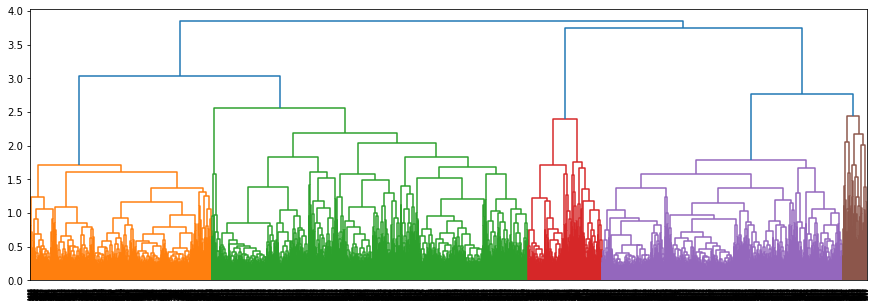

In [14]:
dist = pdist(X, 'euclidean')
linkage_matrix = linkage(dist, method = 'complete')

plt.figure(figsize=(15,5))
dendrogram(linkage_matrix)

plt.show()

Overall k=3 is the best value for this model. The DB score is around 0.8 and the inertia is low as well(0.7). From the dendrogram visualization, it can also be seen than k=3 is the better option to cluster the dataset.